In [1]:
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
from libra_py import models_Tully
from libra_py import models_SSY
from libra_py import models_Martens
from libra_py import models_LVC
from libra_py import models_Henon_Heiles
from libra_py import models_Faist_Levine


import matplotlib.pyplot as plt   # plots
import numpy as np
from matplotlib.mlab import griddata

%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

In [2]:
def plot_map(ax, x, y, X):
    
    colormap =  "plasma" # "Blues" # options: plasma, viridis, binary, hot, etc.
    #colormap =  "Blues" # "Blues" # options: plasma, viridis, binary, hot, etc.
    
    npts_x = len(x)
    npts_y = len(y)
    
    xmin = x[0]
    xmax = x[npts_x-1]
    
    ymin = y[0]
    ymax = y[npts_y-1]
    
    extent=(xmin, xmax, ymin, ymax)
    
    xs0, ys0, zs0 = [], [], []

    for i in xrange(npts_x):    
        for j in xrange(npts_y):
            xs0.append(x[i])
            ys0.append(y[j])
            zs0.append(X[i][j])

    N = 30j
    xs,ys = np.mgrid[extent[0]:extent[1]:N, extent[2]:extent[3]:N]
    zs = griddata(xs0, ys0, zs0,  xs, ys, interp="linear")

    #ax.xticks(energy, rotation=30)
    #ax.yticks(energy, rotation=30)    
    
    ax.xticks(rotation=30)
    ax.yticks(rotation=30)
            
    ax.imshow(zs.T, cmap=colormap, extent=extent, interpolation='Lanczos', origin='lower')
    #ax.plot(xs0, ys0, "bo")
    ax.colorbar()

## 1. Tully Model I

Define the range of x variable

In [3]:
xmin = -10.0
xmax = 10.0
dx = 0.01

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in xrange(nsteps):
    X.append(xmin + i * dx)

Do the calculations

In [4]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
for i in xrange(nsteps):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = models_Tully.Tully1(q, {})
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)    

Plot the results

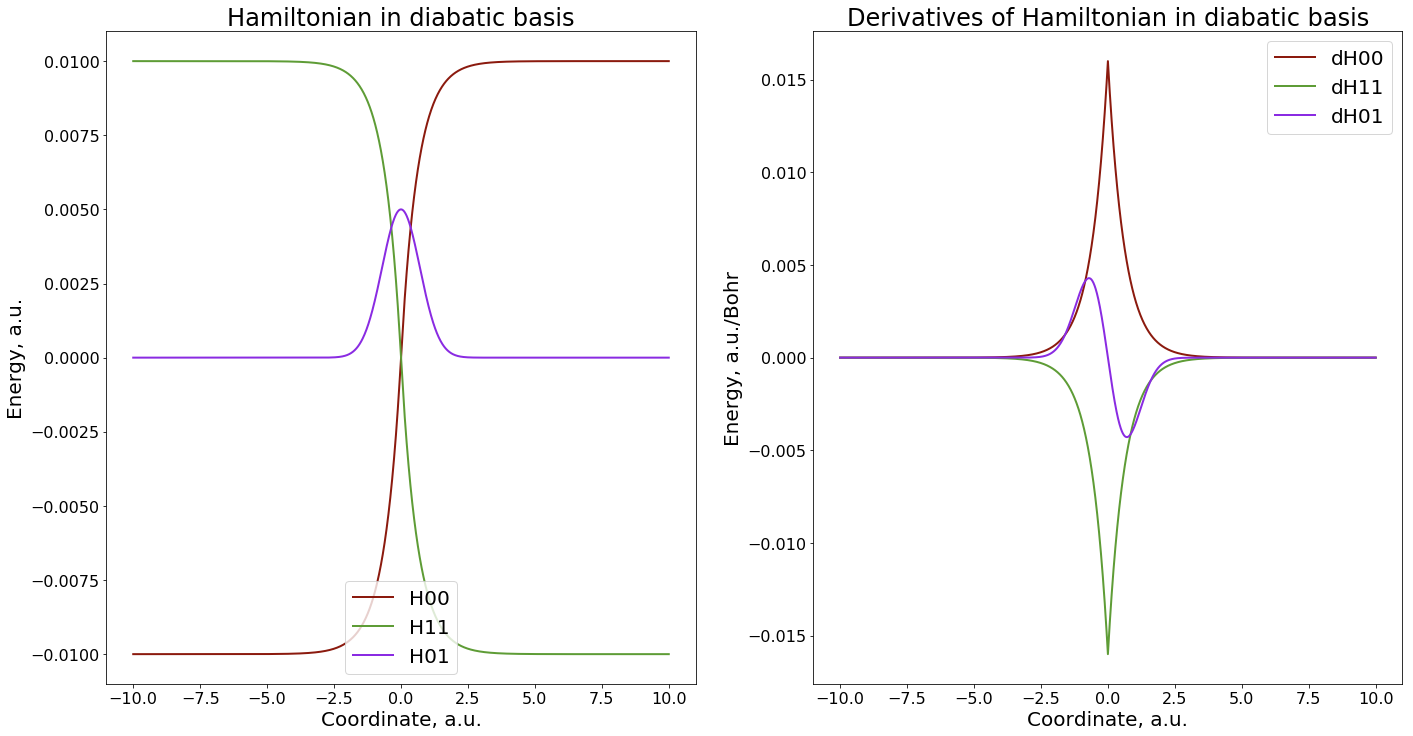

In [5]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

## 2. Tully Model II

Define the range of x values

In [6]:
xmin = -20.0
xmax = 20.0
dx = 0.01

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in xrange(nsteps):
    X.append(xmin + i * dx)

Do the calculations

In [7]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
for i in xrange(nsteps):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = models_Tully.Tully2(q, {})
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)  

Plot the results

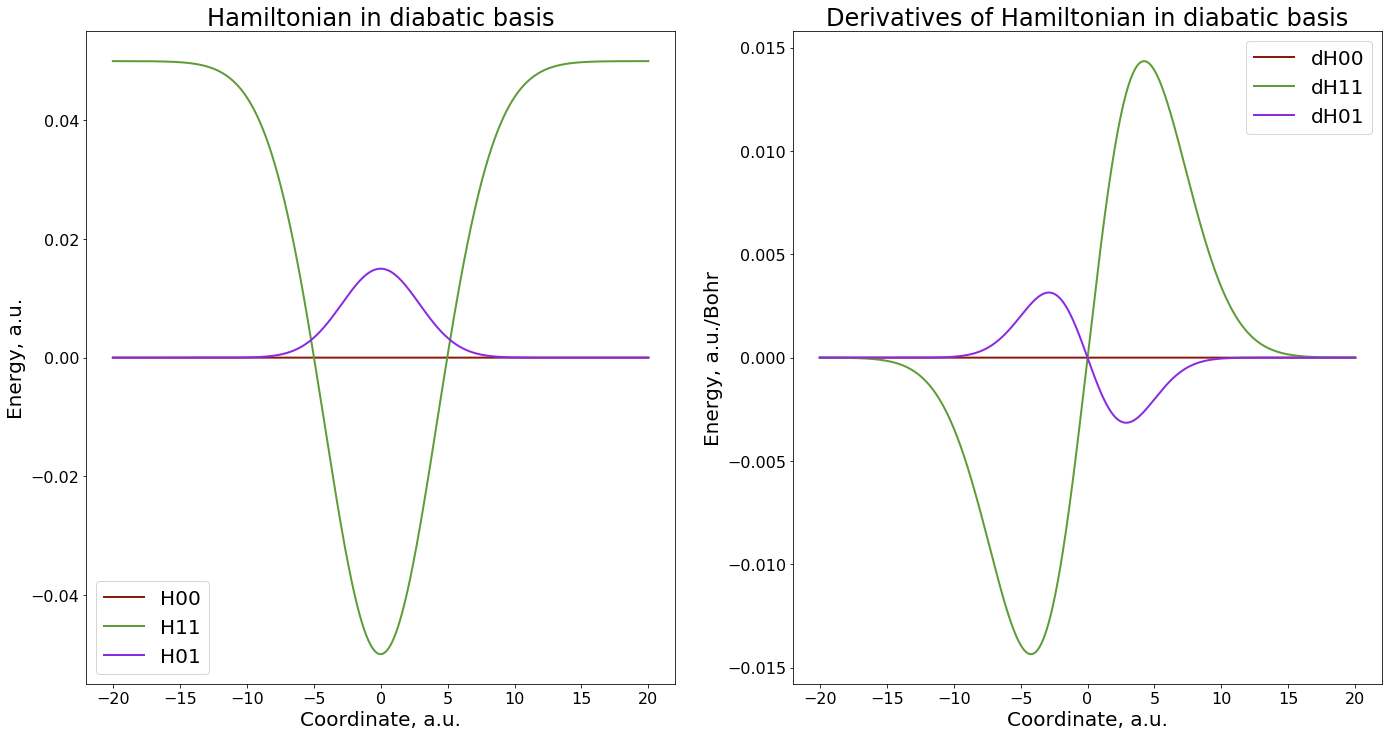

In [8]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

## 3. Tully Model III

Define the range of x values

In [9]:
xmin = -20.0
xmax = 20.0
dx = 0.01

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in xrange(nsteps):
    X.append(xmin + i * dx)

In [10]:
H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
for i in xrange(nsteps):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = models_Tully.Tully3(q, {})
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)

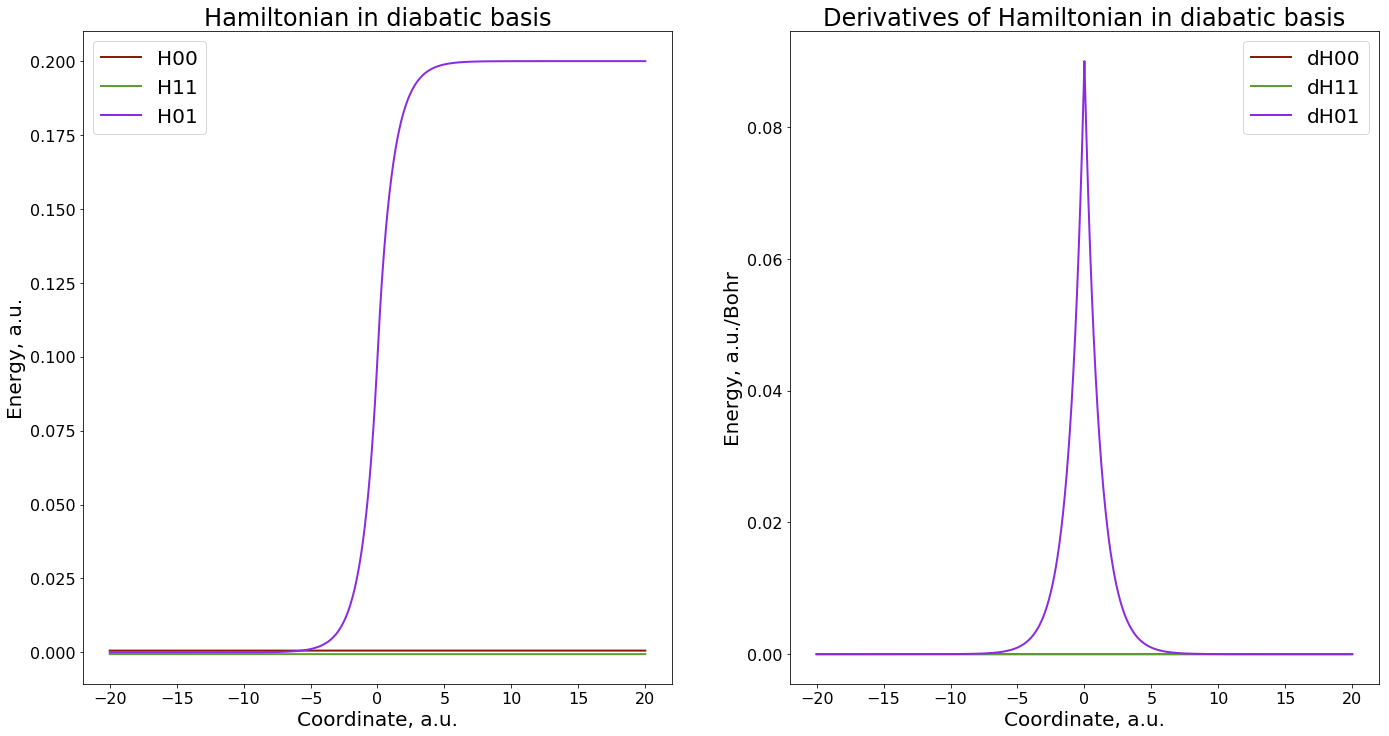

In [11]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

## 4. Shenvi - Subotnik - Yang (SSY)  model

Define the range of x and y values

In [12]:
xmin, xmax, dx = -10.0, 10.0, 0.1
ymin, ymax, dy = -10.0, 10.0, 0.1

X = []
Y = []
nsteps_x = int((xmax - xmin) / dx) + 1
nsteps_y = int((ymax - ymin) / dy) + 1

for i in xrange(nsteps_x):
    X.append(xmin + i * dx)
    
for i in xrange(nsteps_y):
    Y.append(ymin + i * dy)

In [13]:
params = models_SSY.get_SSY()

H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []

for i in xrange(nsteps_x):
    h00, h11, h01 = [], [], []
    dh00, dh11, dh01 = [], [], []
    
    for j in xrange(nsteps_y):
        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = models_SSY.SSY(q, params)
    
        h00.append(obj.ham_dia.get(0,0).real)
        h11.append(obj.ham_dia.get(1,1).real)
        h01.append(obj.ham_dia.get(0,1).real)    
    
        dh00.append(obj.d1ham_dia[0].get(0,0).real)
        dh11.append(obj.d1ham_dia[0].get(1,1).real)
        dh01.append(obj.d1ham_dia[0].get(0,1).real)

    H00.append(h00); H11.append(h11); H01.append(h01);
    dH00.append(dh00); dH11.append(dh11); dH01.append(dh01);

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


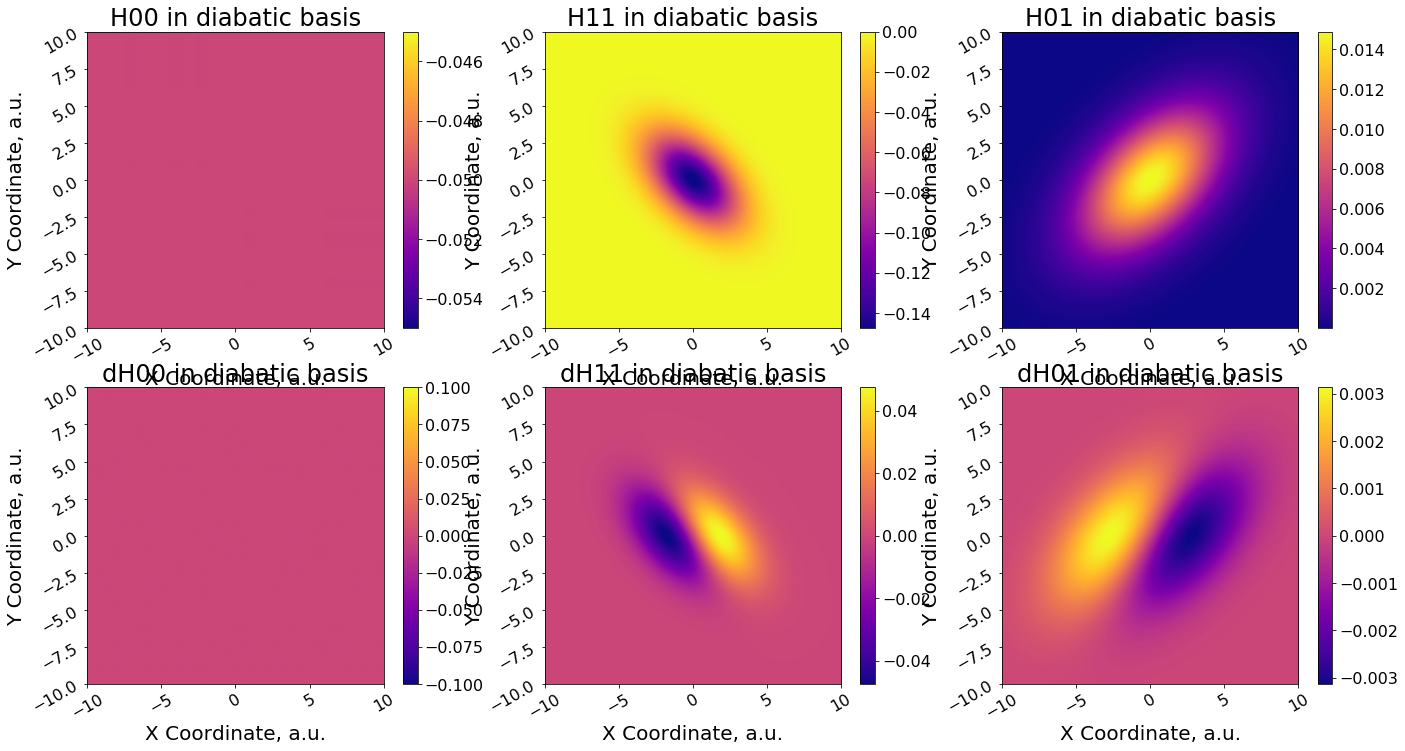

In [14]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(2,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(2,3,2)
plt.title('H11 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H11)

plt.subplot(2,3,3)
plt.title('H01 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H01)

plt.subplot(2,3,4)
plt.title('dH00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00)


plt.subplot(2,3,5)
plt.title('dH11 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH11)

plt.subplot(2,3,6)
plt.title('dH01 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH01)

plt.show()
plt.close()

## 5. Martens model I

Define the range of x and y values

In [15]:
xmin, xmax, dx = -5.0, 5.0, 0.1
ymin, ymax, dy = -1.5, 1.5, 0.1

X = []
Y = []
nsteps_x = int((xmax - xmin) / dx) + 1
nsteps_y = int((ymax - ymin) / dy) + 1

for i in xrange(nsteps_x):
    X.append(xmin + i * dx)
    
for i in xrange(nsteps_y):
    Y.append(ymin + i * dy)

In [16]:
H00, dH00_0, dH00_1 = [], [], []

for i in xrange(nsteps_x):
    h00, dh00_0, dh00_1 = [], [], []
    
    
    for j in xrange(nsteps_y):
        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = models_Martens.model1(q, params)
    
        h00.append(obj.ham_dia.get(0,0).real)            
        dh00_0.append(obj.d1ham_dia[0].get(0,0).real)
        dh00_1.append(obj.d1ham_dia[1].get(0,0).real)
        
    H00.append(h00); dH00_0.append(dh00_0);  dH00_1.append(dh00_1);

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


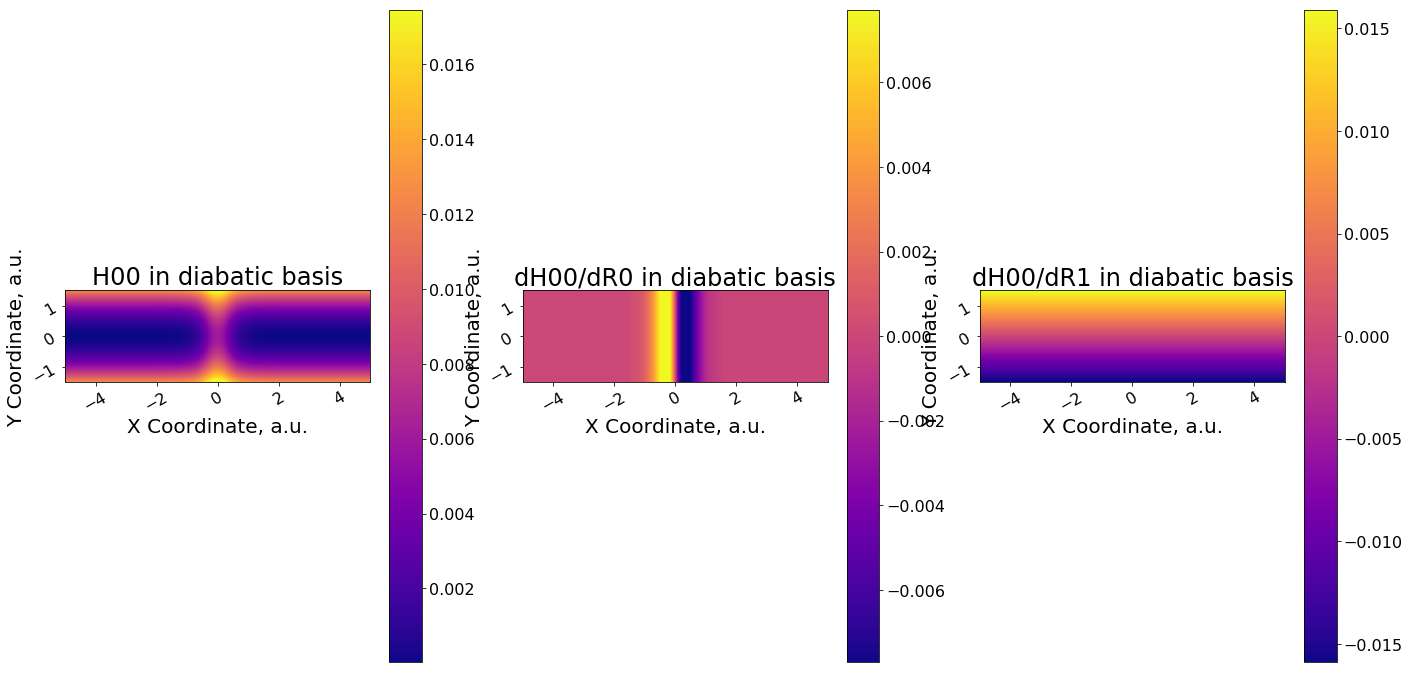

In [17]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(1,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(1,3,2)
plt.title('dH00/dR0 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_0)

plt.subplot(1,3,3)
plt.title('dH00/dR1 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_1)


plt.show()
plt.close()

## 6. Martens model II

Define the range of x and y values

In [18]:
xmin, xmax, dx = -2.5, 2.5, 0.1
ymin, ymax, dy = -1.5, 1.5, 0.1

X = []
Y = []
nsteps_x = int((xmax - xmin) / dx) + 1
nsteps_y = int((ymax - ymin) / dy) + 1

for i in xrange(nsteps_x):
    X.append(xmin + i * dx)
    
for i in xrange(nsteps_y):
    Y.append(ymin + i * dy)

In [19]:
H00, dH00_0, dH00_1 = [], [], []

for i in xrange(nsteps_x):
    h00, dh00_0, dh00_1 = [], [], []
    
    
    for j in xrange(nsteps_y):
        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = models_Martens.model2(q, params)
    
        h00.append(obj.ham_dia.get(0,0).real)            
        dh00_0.append(obj.d1ham_dia[0].get(0,0).real)
        dh00_1.append(obj.d1ham_dia[1].get(0,0).real)
        
    H00.append(h00); dH00_0.append(dh00_0);  dH00_1.append(dh00_1);

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


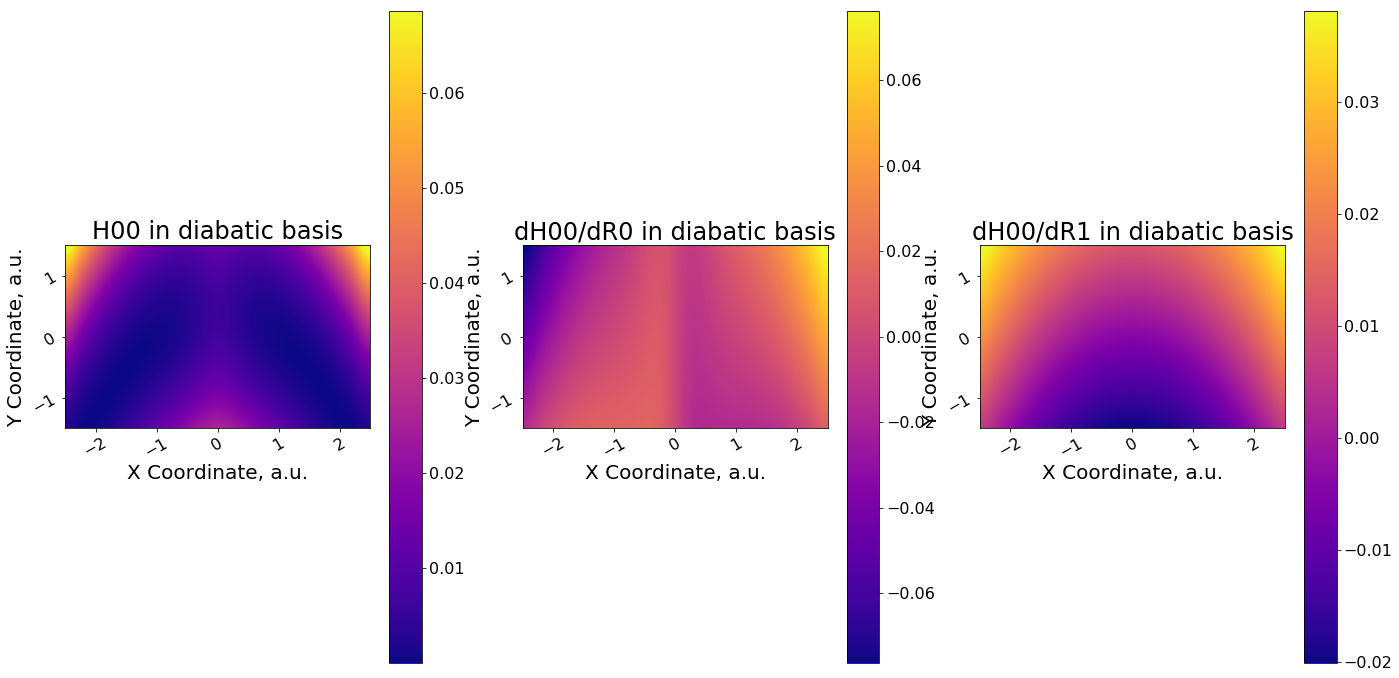

In [20]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(1,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(1,3,2)
plt.title('dH00/dR0 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_0)

plt.subplot(1,3,3)
plt.title('dH00/dR1 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_1)


plt.show()
plt.close()

## 7. LVC, set 1

Define the range of x values

In [21]:
xmin, xmax, dx = -20.0, 20.0, 0.1

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in xrange(nsteps):
    X.append(xmin + i * dx)

In [22]:
params = models_LVC.get_LVC_set1()
ndof = len(params["omega"])
rnd = Random()

q = MATRIX(ndof,1); 
params["mass"] = []
for i in range(0, ndof):
    params["mass"].append(2000.0)
    q.set(i, 0, rnd.uniform(-0.1, 1.1))    

H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
for i in xrange(nsteps):        
    q.set(0, 0, X[i])    
    
    obj = models_LVC.LVC(q, params)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real)    

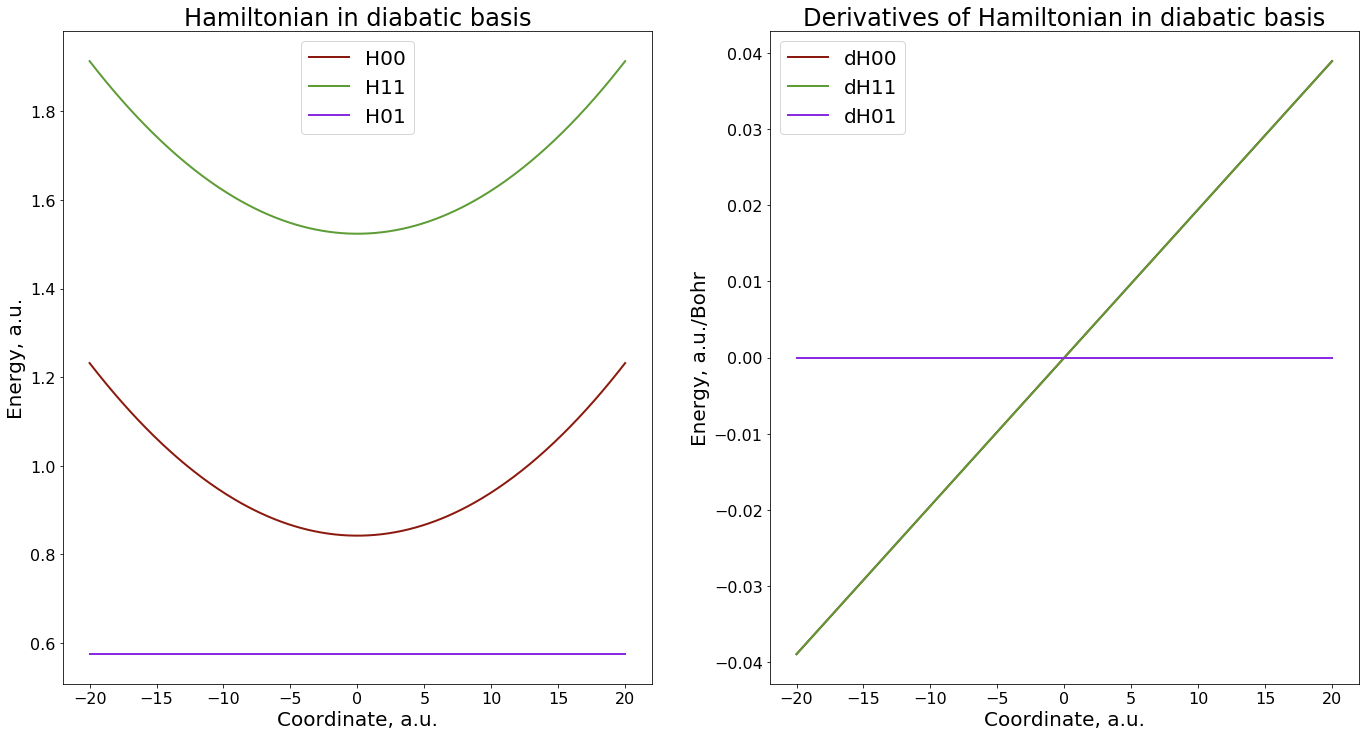

In [23]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

## 8. Henon-Heiles

Define the ranges of x and y values

In [24]:
xmin, xmax, dx = -20.5, 20.5, 0.2
ymin, ymax, dy = -15.5, 15.5, 0.2

X = []
Y = []
nsteps_x = int((xmax - xmin) / dx) + 1
nsteps_y = int((ymax - ymin) / dy) + 1

for i in xrange(nsteps_x):
    X.append(xmin + i * dx)
    
for i in xrange(nsteps_y):
    Y.append(ymin + i * dy)

In [25]:
H00, dH00_0, dH00_1 = [], [], []

for i in xrange(nsteps_x):
    h00, dh00_0, dh00_1 = [], [], []
    
    
    for j in xrange(nsteps_y):
        
        q = MATRIX(2,1); 
        q.set(0, 0, X[i])
        q.set(1, 0, Y[j])
                
        obj = models_Henon_Heiles.Henon_Heiles(q, {})
    
        h00.append(obj.ham_dia.get(0,0).real)            
        dh00_0.append(obj.d1ham_dia[0].get(0,0).real)
        dh00_1.append(obj.d1ham_dia[1].get(0,0).real)
        
    H00.append(h00); dH00_0.append(dh00_0);  dH00_1.append(dh00_1);

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


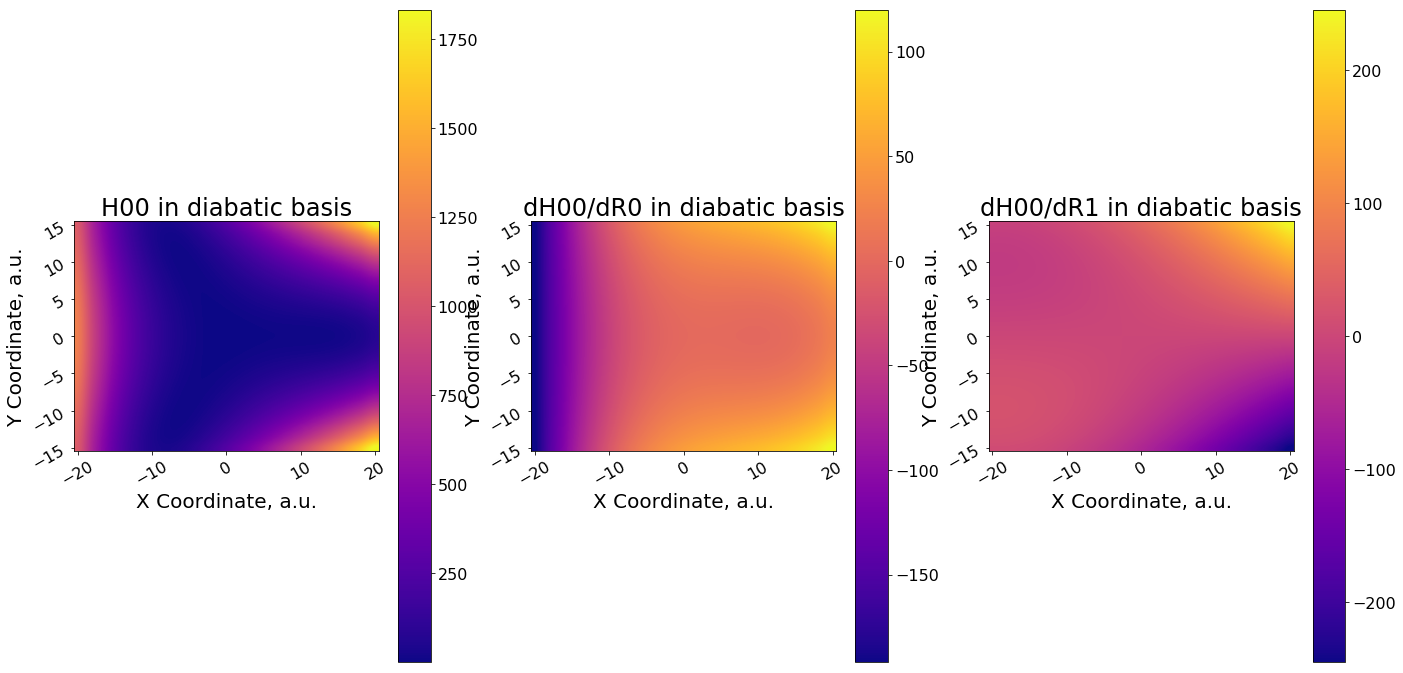

In [26]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.subplot(1,3,1)
plt.title('H00 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, H00)

plt.subplot(1,3,2)
plt.title('dH00/dR0 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_0)

plt.subplot(1,3,3)
plt.title('dH00/dR1 in diabatic basis')
plt.xlabel('X Coordinate, a.u.')
plt.ylabel('Y Coordinate, a.u.')
plot_map(plt, X, Y, dH00_1)


plt.show()
plt.close()

## 9. Faist-Levine, LiI

Define the range of x values

In [27]:
xmin, xmax, dx = 1.5 * units.Angst, 10.0 * units.Angst, 0.1  * units.Angst

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in xrange(nsteps):
    X.append(xmin + i * dx)

In [28]:
params = models_Faist_Levine.get_Faist_Levine_NaI()

print params

q = MATRIX(1,1); 

H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
for i in xrange(nsteps):        
    q.set(0, 0, X[i])    
    
    obj = models_Faist_Levine.Faist_Levine(q, params)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real) 

{'E_th': 0.07625592591231489, 'C_ion': 18.911542644455576, 'A_ion': 101.42956892433209, 'rho': 2.341370500371, 'alp_X-': 43.39852979062752, 'A_cov': 115.76200801146597, 'B_ion': 2.99850620468421, 'alp_M+': 2.7533198809790123, 'rho_cov': 0.822030805215, 'A': 0.6276873323288376, 'rho_ion': 0.6593253975621, 'B_cov': 3.798312872280257, 'C_cov': 1673.5878446420866}


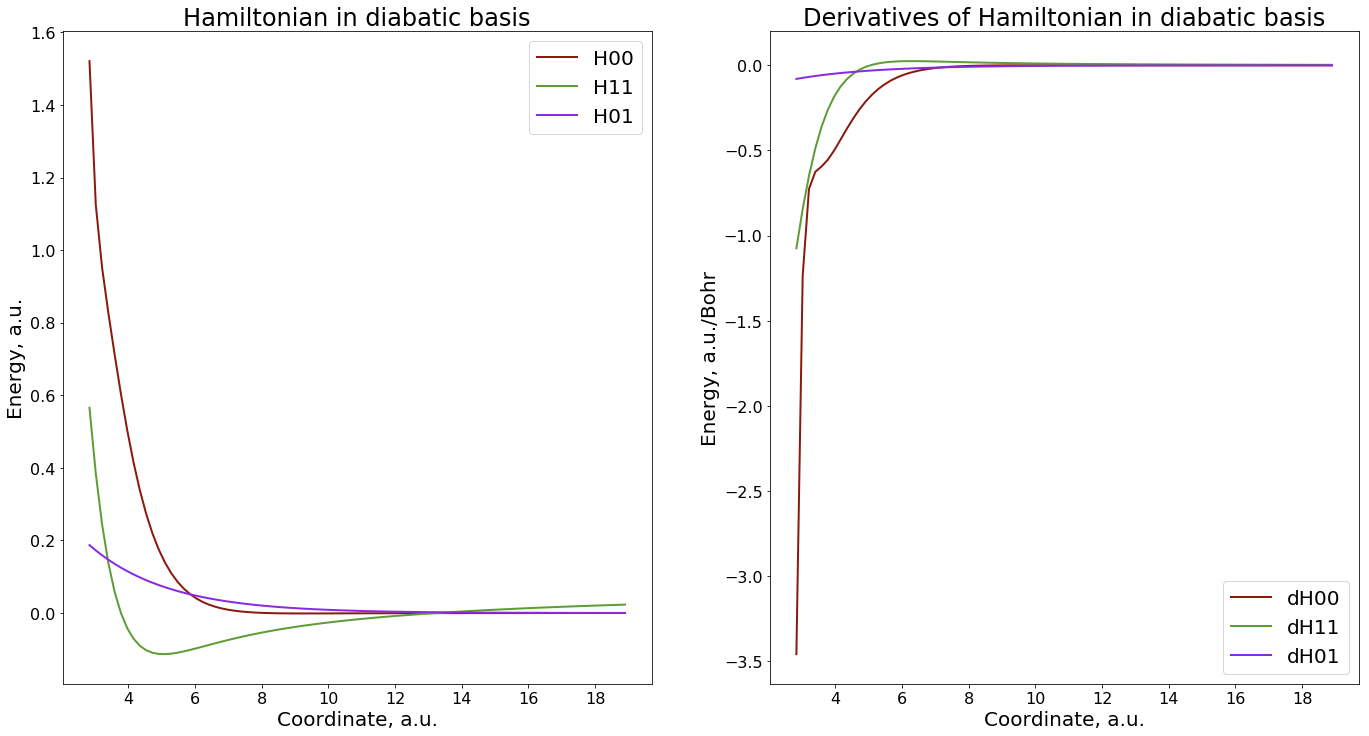

In [29]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()